# Exploratory Economic Data Analysis with FRED #

## Setup: Installations, Imports, Fundamental Objects ##

In [3]:
#install FredApi
!pip install fredapi 

#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

#style
plt.style.use('fivethirtyeight')

#window
pd.set_option("display.max_columns", 500)

#color palette
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#import FredApi
from fredapi import Fred

#assign registered api key to variable
fred_key = '6cac22ead88cd114bfc7eff69e7cc291'

#create fred object
fred = Fred(api_key=fred_key)

  Using cached fredapi-0.5.1-py3-none-any.whl (11 kB)


## General Market Visualization ##

### Search for S&P 500 data ###

In [4]:
#searching for S&P 500 data
sp_search = fred.search('S&P', order_by = 'popularity')

#glimpse results
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-01-24   2024-01-24   
CSUSHPINSA          CSUSHPINSA     2024-01-24   2024-01-24   
SP500                    SP500     2024-01-24   2024-01-24   
MEHOINUSA672N    MEHOINUSA672N     2024-01-24   2024-01-24   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-01-24   2024-01-24   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-01-22  Daily, Close   
CSUSHPINSA            1987-01-01      2023-10-01       Monthly   
SP500                 2014-01-24      2024-01-23  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-01-22  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-01-23 07:47:03-06:00   
CSUSHPINSA                           NSA  2023-12-26 08:12:02-06:00   
SP500                                NSA  2024-01-23 19:13:16-06:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-01-23 07:47:07-06:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             87  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          82  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

### Pull raw data and plot ###

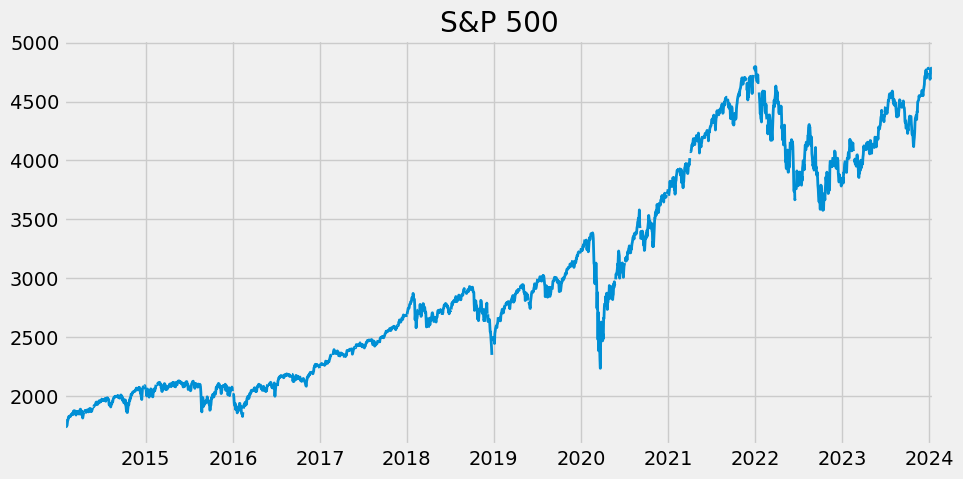

In [5]:
#pull S&P 500 from series id 
sp500 = fred.get_series(series_id = 'SP500')

#plot
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw = 2)
plt.show()

Above plot displays the points of the S&P 500 over time

### Search for/Pull Additional Economic Data (NASDAQ and Dow Jones) ### 

In [25]:
#searching for S&P 500 data
nq_search = fred.search('NASDAQ', order_by = 'popularity')


#glimpse results
nq_search.head()


id realtime_start realtime_end  \
series id                                          
SP500          SP500     2024-01-24   2024-01-24   
NASDAQCOM  NASDAQCOM     2024-01-24   2024-01-24   
NASDAQ100  NASDAQ100     2024-01-24   2024-01-24   
VXNCLS        VXNCLS     2024-01-24   2024-01-24   

                                      title observation_start observation_end  \
series id                                                                       
SP500                               S&P 500        2014-01-24      2024-01-23   
NASDAQCOM            NASDAQ Composite Index        1971-02-05      2024-01-23   
NASDAQ100                  NASDAQ 100 Index        1986-01-02      2024-01-23   
VXNCLS     CBOE NASDAQ 100 Volatility Index        2001-02-02      2024-01-23   

              frequency frequency_short                  units  \
series id                                                        
SP500      Daily, Close               D                  Index   
NASDAQCOM  Daily, Close               D  Index Feb 5, 1971=100   
NASDAQ100  Daily, Close               D                  Index   
VXNCLS     Daily, Close               D                  Index   

                     units_short      seasonal_adjustment  \
series id                                                   
SP500                      Index  Not Seasonally Adjusted   
NASDAQCOM  Index Feb 5, 1971=100  Not Seasonally Adjusted   
NASDAQ100                  Index  Not Seasonally Adjusted   
VXNCLS                     Index  Not Seasonally Adjusted   

          seasonal_adjustment_short              last_updated popularity  \
series id                                                                  
SP500                           NSA 2024-01-23 19:13:16-06:00         83   
NASDAQCOM                       NSA 2024-01-24 09:37:02-06:00         68   
NASDAQ100                       NSA 2024-01-24 09:37:04-06:00         58   
VXNCLS                          NSA 2024-01-24 08:36:06-06:00         39   

                                                       notes  
series id                                                     
SP500      The observations for the S&P 500 represent the...  
NASDAQCOM  The observations for the NASDAQ Composite Inde...  
NASDAQ100  The observations for the NASDAQ 100 Index repr...  
VXNCLS     Copyright, 2016, Chicago Board Options Exchang...

In [ ]:
nasdaq = fred.get_series(series_id = 'NASDAQCOM')

In [26]:
dj_search = fred.search('Dow Jones', order_by = 'popularity')

dj_search.head()

id realtime_start realtime_end  \
series id                                            
CSUSHPINSA  CSUSHPINSA     2024-01-24   2024-01-24   
SP500            SP500     2024-01-24   2024-01-24   
CSUSHPISA    CSUSHPISA     2024-01-24   2024-01-24   
DJIA              DJIA     2024-01-24   2024-01-24   
SPCS20RSA    SPCS20RSA     2024-01-24   2024-01-24   

                                                        title  \
series id                                                       
CSUSHPINSA  S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                 S&P 500   
CSUSHPISA   S&P CoreLogic Case-Shiller U.S. National Home ...   
DJIA                             Dow Jones Industrial Average   
SPCS20RSA   S&P CoreLogic Case-Shiller 20-City Composite H...   

           observation_start observation_end     frequency frequency_short  \
series id                                                                    
CSUSHPINSA        1987-01-01      2023-10-01       Monthly               M   
SP500             2014-01-24      2024-01-23  Daily, Close               D   
CSUSHPISA         1987-01-01      2023-10-01       Monthly               M   
DJIA              2014-01-24      2024-01-23  Daily, Close               D   
SPCS20RSA         2000-01-01      2023-10-01       Monthly               M   

                         units         units_short      seasonal_adjustment  \
series id                                                                     
CSUSHPINSA  Index Jan 2000=100  Index Jan 2000=100  Not Seasonally Adjusted   
SP500                    Index               Index  Not Seasonally Adjusted   
CSUSHPISA   Index Jan 2000=100  Index Jan 2000=100      Seasonally Adjusted   
DJIA                     Index               Index  Not Seasonally Adjusted   
SPCS20RSA   Index Jan 2000=100  Index Jan 2000=100      Seasonally Adjusted   

           seasonal_adjustment_short               last_updated popularity  \
series id                                                                    
CSUSHPINSA                       NSA  2023-12-26 08:12:02-06:00         87   
SP500                            NSA  2024-01-23 19:13:16-06:00         83   
CSUSHPISA                         SA  2023-12-26 08:12:02-06:00         77   
DJIA                             NSA  2024-01-23 19:17:11-06:00         72   
SPCS20RSA                         SA  2023-12-26 08:11:02-06:00         70   

                                                        notes  
series id                                                      
CSUSHPINSA  For more information regarding the index, plea...  
SP500       The observations for the S&P 500 represent the...  
CSUSHPISA   For more information regarding the index, plea...  
DJIA        The observations for the Dow Jones Industrial ...  
SPCS20RSA   For more information regarding the index, plea...

In [27]:
nasdaq = fred.get_series(series_id = 'NASDAQCOM')
dowjones = fred.get_series(series_id = 'DJIA')

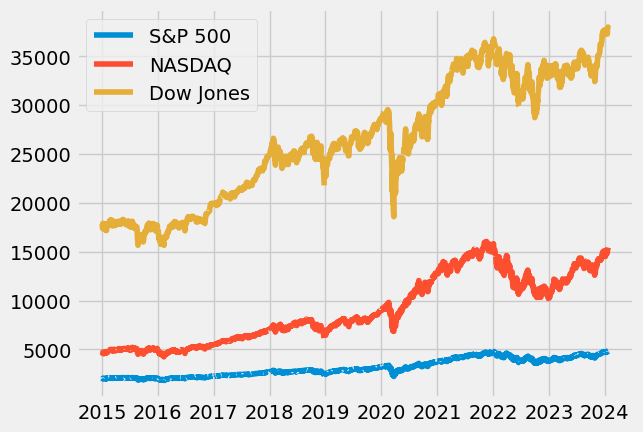

In [35]:
#filter for 2015 onwards, when data is available for s&p on FRED
sp500_filtered = sp500['2015':]
nasdaq_filtered = nasdaq['2015':]
dowjones_filtered = dowjones['2015':]

#plot first series
plt.plot(sp500_filtered, label='S&P 500')

# Overlay the second series on the same plot
plt.plot(nasdaq_filtered, label='NASDAQ')

# Overlay the third series on the same plot
plt.plot(dowjones_filtered, label='Dow Jones')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Unemployment EDA ##

### Search for Unemployment Data by State ###

In [6]:
#general filtering
unemp_df = fred.search('unemployment rate by state', filter = ('frequency','Monthly')) 
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') 
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

#removing rows that contained data for cities/regions/districts instead of states
strings_to_delete = ['LASMT261982000000003', 'LASMT391746000000003', 'USAURAMS' ,
                     'CNEWUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'DCUR', 'PRUR'] 
mask = unemp_df['id'].isin(strings_to_delete)
unemp_df = unemp_df[~mask]

#print dataframe
unemp_df

id realtime_start realtime_end  \
series id                                     
CAUR       CAUR     2024-01-24   2024-01-24   
TXUR       TXUR     2024-01-24   2024-01-24   
FLUR       FLUR     2024-01-24   2024-01-24   
NYUR       NYUR     2024-01-24   2024-01-24   
OHUR       OHUR     2024-01-24   2024-01-24   
MIUR       MIUR     2024-01-24   2024-01-24   
PAUR       PAUR     2024-01-24   2024-01-24   
ILUR       ILUR     2024-01-24   2024-01-24   
ALUR       ALUR     2024-01-24   2024-01-24   
NCUR       NCUR     2024-01-24   2024-01-24   
NJUR       NJUR     2024-01-24   2024-01-24   
GAUR       GAUR     2024-01-24   2024-01-24   
COUR       COUR     2024-01-24   2024-01-24   
MAUR       MAUR     2024-01-24   2024-01-24   
WIUR       WIUR     2024-01-24   2024-01-24   
MNUR       MNUR     2024-01-24   2024-01-24   
KYUR       KYUR     2024-01-24   2024-01-24   
SCUR       SCUR     2024-01-24   2024-01-24   
ORUR       ORUR     2024-01-24   2024-01-24   
AZUR       AZUR     2024-01-24   2024-01-24   
IAUR       IAUR     2024-01-24   2024-01-24   
VAUR       VAUR     2024-01-24   2024-01-24   
TNUR       TNUR     2024-01-24   2024-01-24   
ARUR       ARUR     2024-01-24   2024-01-24   
MDUR       MDUR     2024-01-24   2024-01-24   
INUR       INUR     2024-01-24   2024-01-24   
WVUR       WVUR     2024-01-24   2024-01-24   
NVUR       NVUR     2024-01-24   2024-01-24   
MOUR       MOUR     2024-01-24   2024-01-24   
NDUR       NDUR     2024-01-24   2024-01-24   
WAUR       WAUR     2024-01-24   2024-01-24   
NMUR       NMUR     2024-01-24   2024-01-24   
UTUR       UTUR     2024-01-24   2024-01-24   
HIUR       HIUR     2024-01-24   2024-01-24   
CTUR       CTUR     2024-01-24   2024-01-24   
MSUR       MSUR     2024-01-24   2024-01-24   
LAUR       LAUR     2024-01-24   2024-01-24   
OKUR       OKUR     2024-01-24   2024-01-24   
KSUR       KSUR     2024-01-24   2024-01-24   
NEUR       NEUR     2024-01-24   2024-01-24   
WYUR       WYUR     2024-01-24   2024-01-24   
AKUR       AKUR     2024-01-24   2024-01-24   
MTUR       MTUR     2024-01-24   2024-01-24   
SDUR       SDUR     2024-01-24   2024-01-24   
IDUR       IDUR     2024-01-24   2024-01-24   
DEUR       DEUR     2024-01-24   2024-01-24   
MEUR       MEUR     2024-01-24   2024-01-24   
NHUR       NHUR     2024-01-24   2024-01-24   
RIUR       RIUR     2024-01-24   2024-01-24   
VTUR       VTUR     2024-01-24   2024-01-24   

                                         title observation_start  \
series id                                                          
CAUR           Unemployment Rate in California        1976-01-01   
TXUR                Unemployment Rate in Texas        1976-01-01   
FLUR              Unemployment Rate in Florida        1976-01-01   
NYUR             Unemployment Rate in New York        1976-01-01   
OHUR                 Unemployment Rate in Ohio        1976-01-01   
MIUR             Unemployment Rate in Michigan        1976-01-01   
PAUR         Unemployment Rate in Pennsylvania        1976-01-01   
ILUR             Unemployment Rate in Illinois        1976-01-01   
ALUR              Unemployment Rate in Alabama        1976-01-01   
NCUR       Unemployment Rate in North Carolina        1976-01-01   
NJUR           Unemployment Rate in New Jersey        1976-01-01   
GAUR              Unemployment Rate in Georgia        1976-01-01   
COUR             Unemployment Rate in Colorado        1976-01-01   
MAUR        Unemployment Rate in Massachusetts        1976-01-01   
WIUR            Unemployment Rate in Wisconsin        1976-01-01   
MNUR            Unemployment Rate in Minnesota        1976-01-01   
KYUR             Unemployment Rate in Kentucky        1976-01-01   
SCUR       Unemployment Rate in South Carolina        1976-01-01   
ORUR               Unemployment Rate in Oregon        1976-01-01   
AZUR              Unemployment Rate in Arizona        1976-01-01   
IAUR                 Unemployment Rate in Iowa        1976-01-01   
VAUR

### Pull and Join States Data Series ###

In [16]:
all_results = [] #store results in list

#loop through index, assign columns by id
for myid in unemp_df.index:  
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

### Visualize Unemployment Rate for all States Over Time ###

In [17]:
#concatenate unemployment rates (by id) and print
unemp_results = pd.concat(all_results, axis = 1)

#check for na values
unemp_results.isna().sum(axis = 1)

#drop na values
unemp_results.dropna()

#replace column ids with state names
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_results.columns = [id_to_state[c] for c in unemp_results.columns]

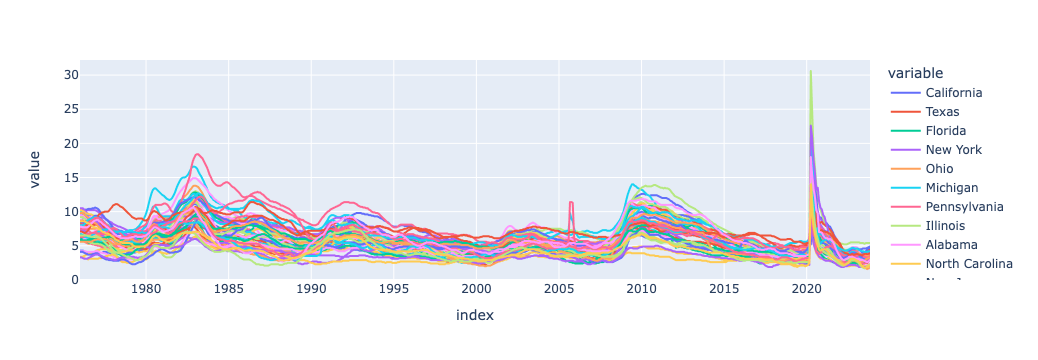

In [18]:
px.line(unemp_results)

GitHub is unable to render interactive plots made using plotly such as this, so the plot that would have been here is contained in the linked pasted in the readme.

### Pull April 2020 Unemployment Rate Per State and Plot

April 2020 was the height of the unemployment spike due to the Covid-19 pandemic, we can visualize it in more detail to see how it affected different states.

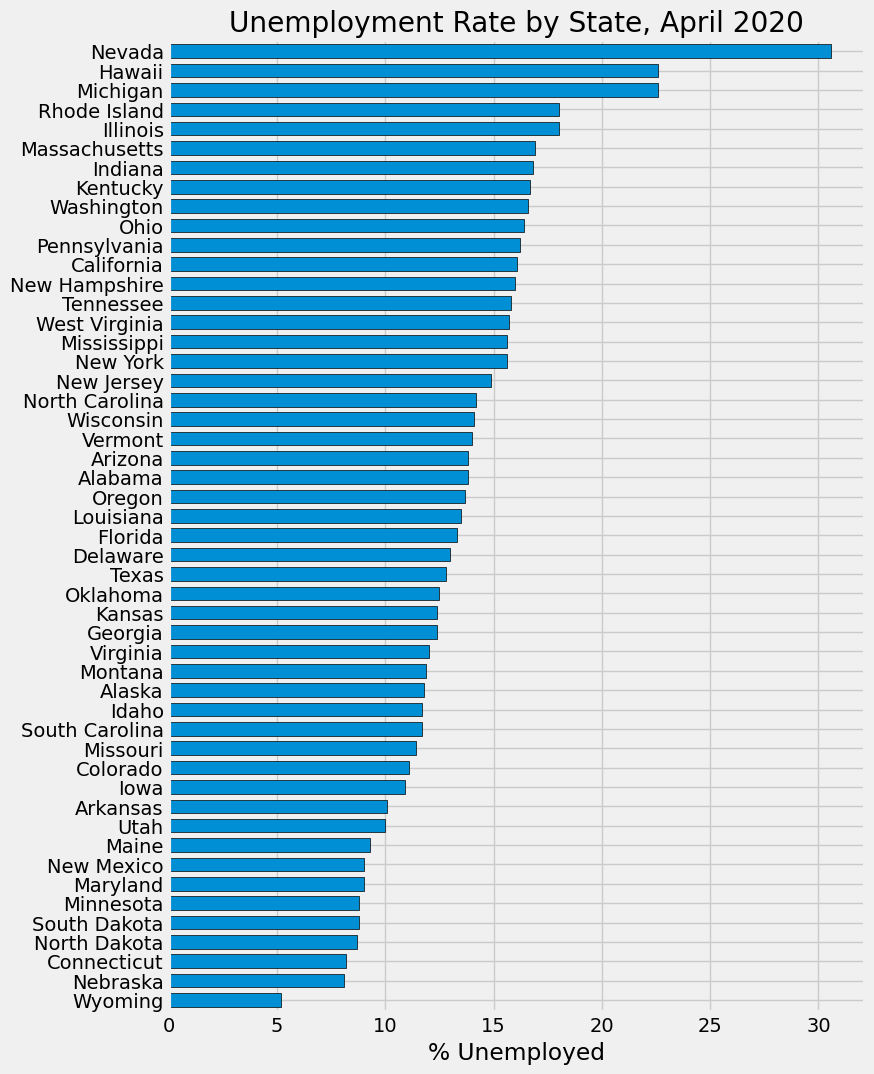

In [10]:
#Plot results for specific month (April) horizontally
ax = unemp_results.loc[unemp_results.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind = 'barh', figsize = (8, 12), width=0.7, edgecolor = 'black', title = 'Unemployment Rate by State, April 2020')

#remove legend
ax.legend().remove()

#set x-axis label
ax.set_xlabel('% Unemployed')

#display plot
plt.show()

## Combining Unemployment with Labour Force Participation ###

### Search for Labour Force Participation ###

In [11]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]
part_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-01-24   2024-01-24   
LBSSA01    LBSSA01     2024-01-24   2024-01-24   
LBSSA26    LBSSA26     2024-01-24   2024-01-24   
LBSSA55    LBSSA55     2024-01-24   2024-01-24   
LBSSA28    LBSSA28     2024-01-24   2024-01-24   
LBSSA12    LBSSA12     2024-01-24   2024-01-24   
LBSSA36    LBSSA36     2024-01-24   2024-01-24   
LBSSA21    LBSSA21     2024-01-24   2024-01-24   
LBSSA27    LBSSA27     2024-01-24   2024-01-24   
LBSSA49    LBSSA49     2024-01-24   2024-01-24   
LBSSA48    LBSSA48     2024-01-24   2024-01-24   
LBSSA39    LBSSA39     2024-01-24   2024-01-24   
LBSSA47    LBSSA47     2024-01-24   2024-01-24   
LBSSA24    LBSSA24     2024-01-24   2024-01-24   
LBSSA42    LBSSA42     2024-01-24   2024-01-24   
LBSSA37    LBSSA37     2024-01-24   2024-01-24   
LBSSA08    LBSSA08     2024-01-24   2024-01-24   
LBSSA25    LBSSA25     2024-01-24   2024-01-24   
LBSSA35    LBSSA35     2024-01-24   2024-01-24   
LBSSA22    LBSSA22     2024-01-24   2024-01-24   
LBSSA53    LBSSA53     2024-01-24   2024-01-24   
LBSSA17    LBSSA17     2024-01-24   2024-01-24   
LBSSA54    LBSSA54     2024-01-24   2024-01-24   
LBSSA45    LBSSA45     2024-01-24   2024-01-24   
LBSSA23    LBSSA23     2024-01-24   2024-01-24   
LBSSA04    LBSSA04     2024-01-24   2024-01-24   
LBSSA34    LBSSA34     2024-01-24   2024-01-24   
LBSSA13    LBSSA13     2024-01-24   2024-01-24   
LBSSA09    LBSSA09     2024-01-24   2024-01-24   
LBSSA02    LBSSA02     2024-01-24   2024-01-24   
LBSSA31    LBSSA31     2024-01-24   2024-01-24   
LBSSA20    LBSSA20     2024-01-24   2024-01-24   
LBSSA19    LBSSA19     2024-01-24   2024-01-24   
LBSSA33    LBSSA33     2024-01-24   2024-01-24   
LBSSA51    LBSSA51     2024-01-24   2024-01-24   
LBSSA32    LBSSA32     2024-01-24   2024-01-24   
LBSSA40    LBSSA40     2024-01-24   2024-01-24   
LBSSA18    LBSSA18     2024-01-24   2024-01-24   
LBSSA41    LBSSA41     2024-01-24   2024-01-24   
LBSSA38    LBSSA38     2024-01-24   2024-01-24   
LBSSA29    LBSSA29     2024-01-24   2024-01-24   
LBSSA50    LBSSA50     2024-01-24   2024-01-24   
LBSSA15    LBSSA15     2024-01-24   2024-01-24   
LBSSA30    LBSSA30     2024-01-24   2024-01-24   
LBSSA16    LBSSA16     2024-01-24   2024-01-24   
LBSSA05    LBSSA05     2024-01-24   2024-01-24   
LBSSA56    LBSSA56     2024-01-24   2024-01-24   
LBSSA46    LBSSA46     2024-01-24   2024-01-24   
LBSSA10    LBSSA10     2024-01-24   2024-01-24   
LBSSA44    LBSSA44     2024-01-24   2024-01-24   
LBSSA11    LBSSA11     2024-01-24   2024-01-24   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA49              Labor Force Participation Rate for Utah   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA08          Labor Force Participation Rate for Colorado   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA35        Labor Force Participation Rate for New Mexico   
LBSSA22         Labor

### Pull raw data ###

In [12]:
#replace id with title
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

#loop through index, assign columns by id
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

### Plot Unemployment vs. Labour Participation for States ###

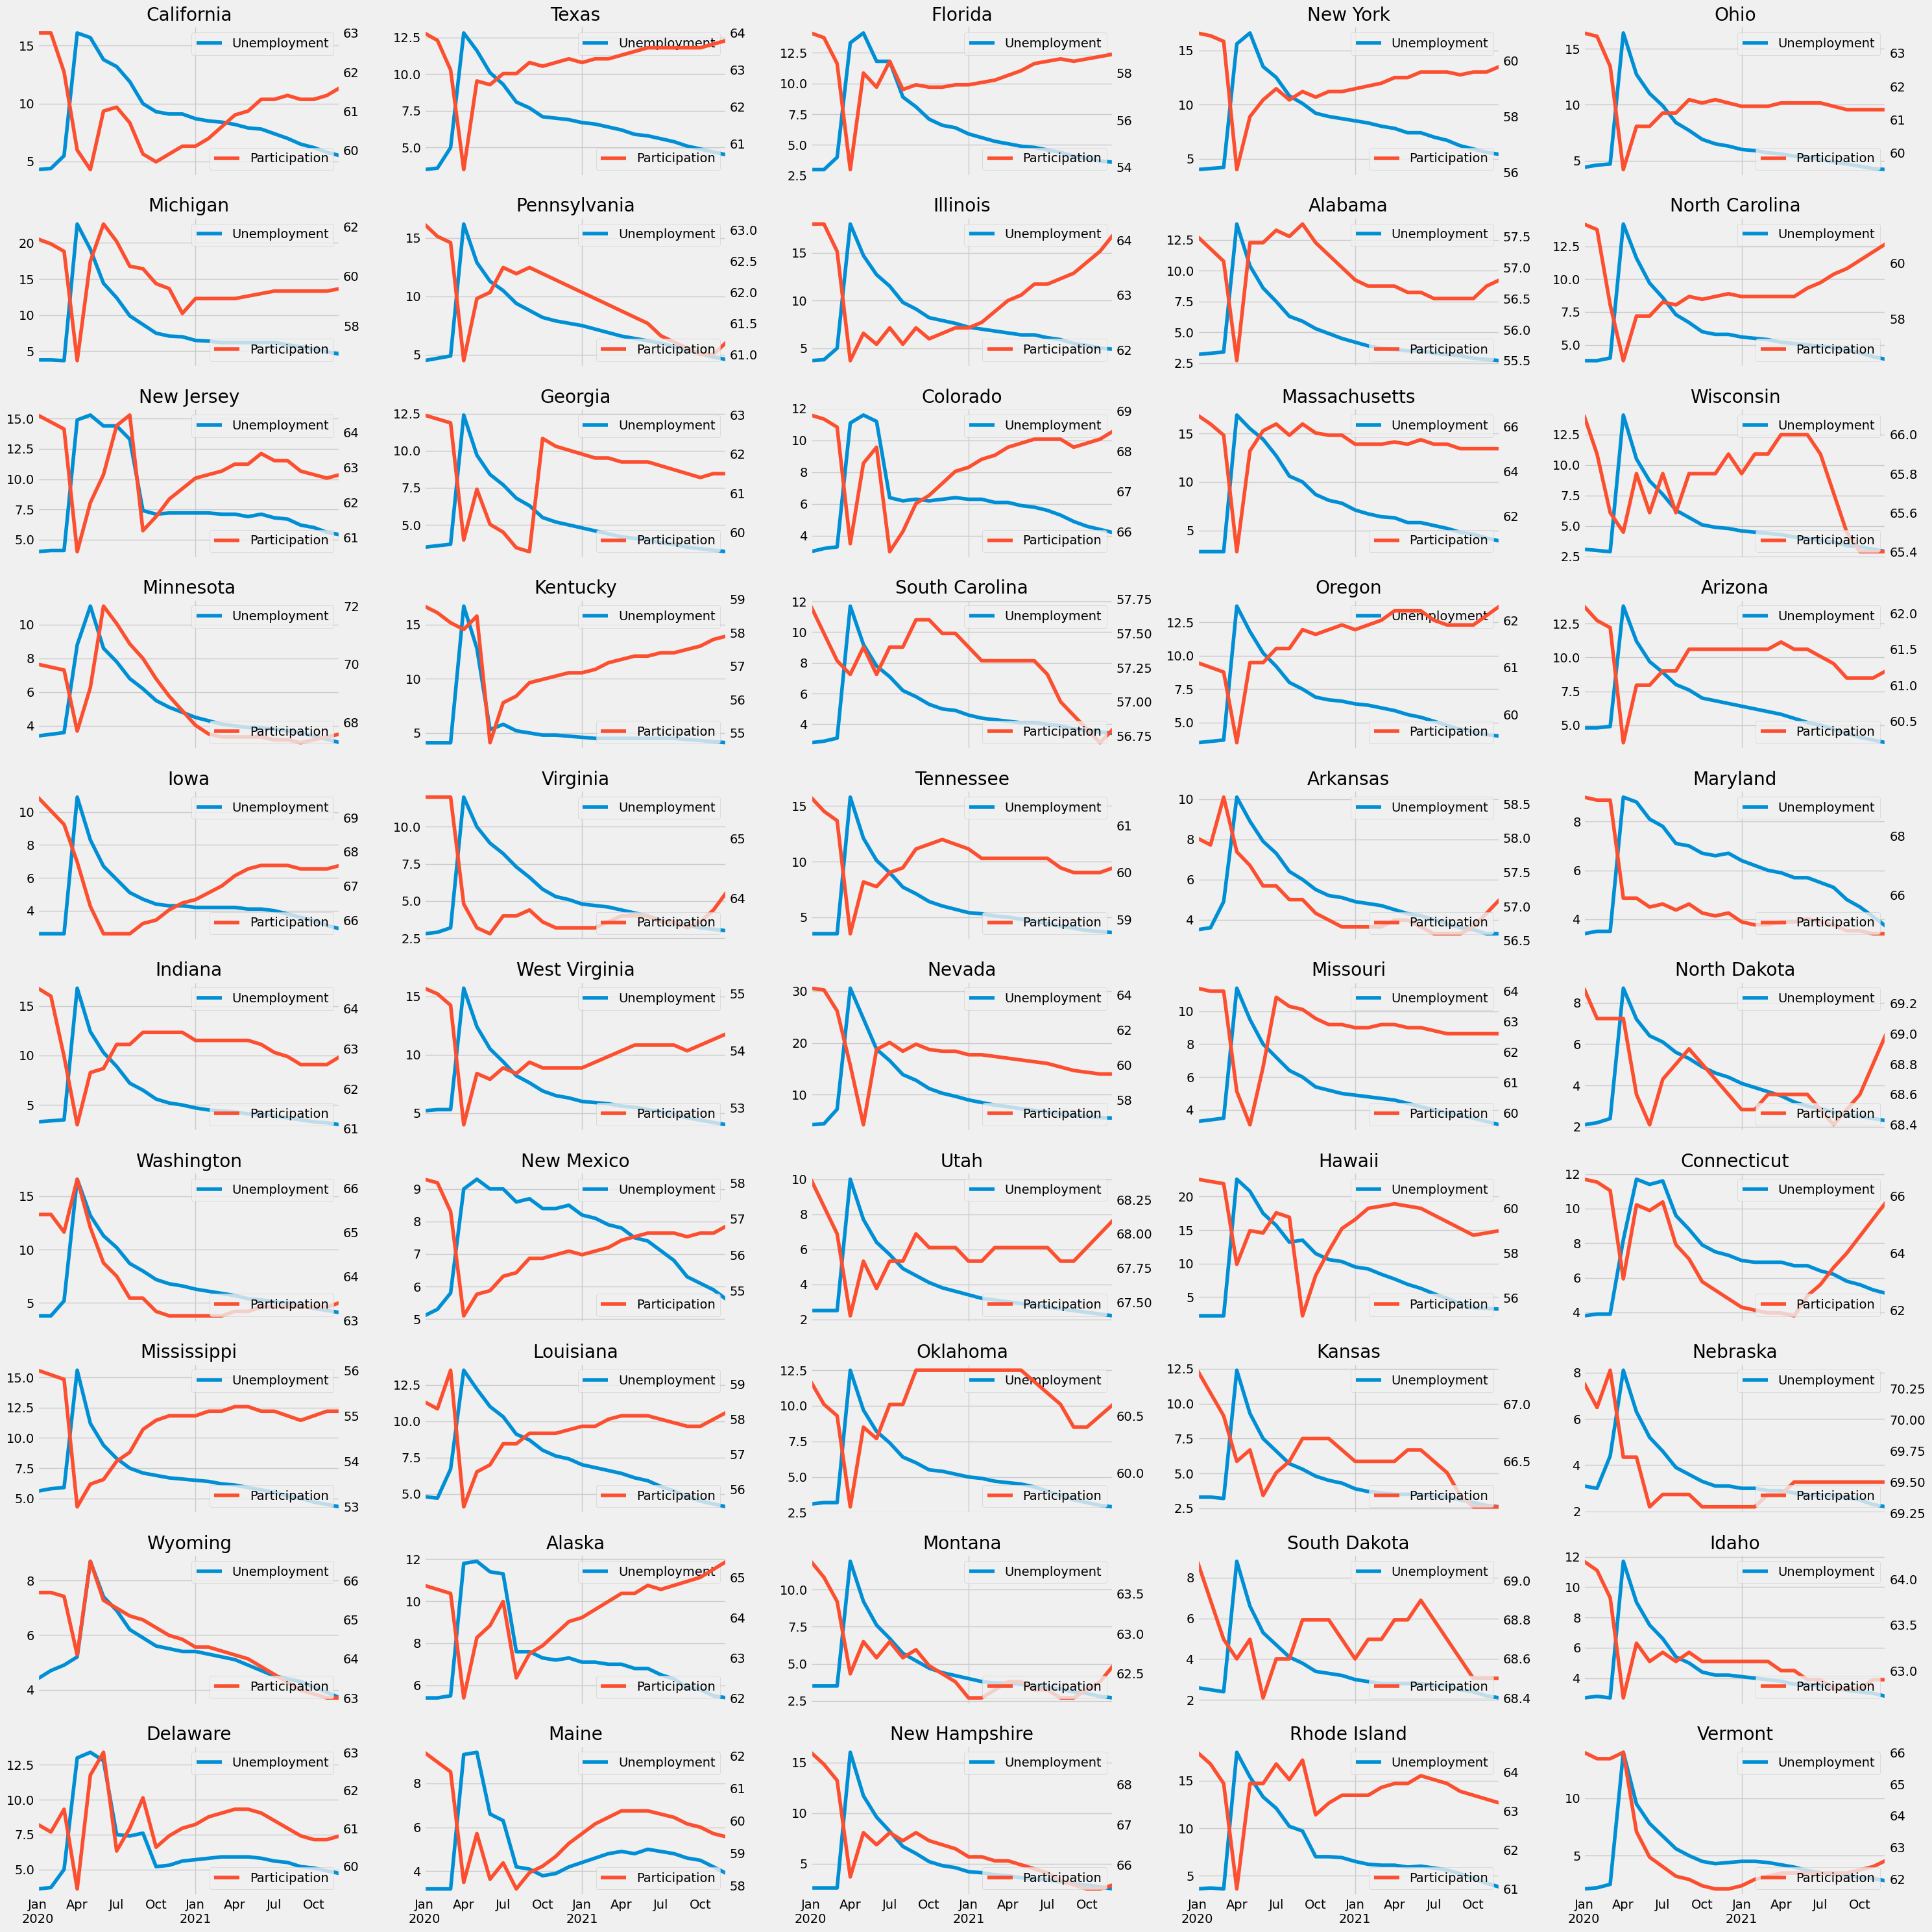

In [22]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

#loop through states in unemployment, plot against labour participation
i = 0
for state in unemp_results.columns:
    if state in ["Puerto Rico"]:  #skip Puerto Rico
        continue
    ax2 = axs[i].twinx()
    unemp_results.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    axs[i].legend(loc='upper right')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.legend(loc='lower right')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()